# Sesión 1 – Apartado 1: Entorno profesional y *Stack* habitual

**Duración recomendada:** 20–30 min  
**Objetivos:**
- Conocer el *stack* típico de ciencia de datos con Python.
- Preparar un entorno reproducible y una estructura de proyecto.
- Cargar un dataset y realizar una EDA inicial con gráficos sencillos.

> Fecha de generación del cuaderno: 2025-09-09 11:11:19

## 1) Stack habitual

Usaremos las siguientes librerías:

- `pandas` para manipulación de datos
- `numpy` para operaciones numéricas
- `scikit-learn` para *ML* y *pipelines*
- `matplotlib` para visualización básica
- `seaborn` (opcional) para visualizaciones de alto nivel

💡 Recomendación: usar un entorno virtual (conda/venv) y un fichero `requirements.txt`.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print('Python:', sys.version)
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('matplotlib:', plt.matplotlib.__version__)
print('seaborn:', sns.__version__)
print('scikit-learn:', sklearn.__version__)

Python: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
numpy: 2.3.2
pandas: 2.3.2
matplotlib: 3.10.6
seaborn: 0.13.2
scikit-learn: 1.7.2


## 2) Estructura de proyecto recomendada

```
project/
├─ data/
│  ├─ raw/
│  └─ processed/
├─ notebooks/
├─ src/
│  ├─ __init__.py
│  └─ utils.py
├─ models/
├─ reports/
├─ requirements.txt
└─ README.md
```
Mantén los *notebooks* limpios y usa funciones en `src/` para lógica reutilizable.

## 3) Carga de datos

Usaremos un dataset sintético tipo *Titanic*, ya guardado en `data/mini_titanic.csv`.
Incluye columnas numéricas y categóricas con valores nulos para practicar imputación y codificación.

In [4]:
df = pd.read_csv('../data/raw/mini_titanic.csv')
df.head()

,sex,class,age,fare,survived
0,male,Third,34.352706,119.00,0
1,female,Second,50.654987,66.77,0
2,male,First,42.007235,21.87,0
3,male,Second,27.760861,NaN,0
4,male,Third,29.733773,212.45,0


## 4) Auditoría rápida de calidad de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       300 non-null    object 
 1   class     285 non-null    object 
 2   age       265 non-null    float64
 3   fare      280 non-null    float64
 4   survived  300 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB


In [6]:
df.describe(include='all')

,sex,class,age,fare,survived
count,300,285,265.000000,280.000000,300.000000
unique,2,3,NaN,NaN,NaN
top,male,Third,NaN,NaN,NaN
freq,151,155,NaN,NaN,NaN
mean,NaN,NaN,29.755908,38.931250,0.213333
std,NaN,NaN,14.370522,34.615436,0.410346
min,NaN,NaN,0.000000,3.250000,0.000000
25%,NaN,NaN,19.166951,17.390000,0.000000
50%,NaN,NaN,30.073412,29.120000,0.000000
75%,NaN,NaN,39.161119,46.772500,0.000000


In [7]:
# Conteo de nulos por columna
df.isna().sum().sort_values(ascending=False)

age         35
fare        20
class       15
sex          0
survived     0
dtype: int64

## 5) Visualizaciones rápidas (matplotlib)

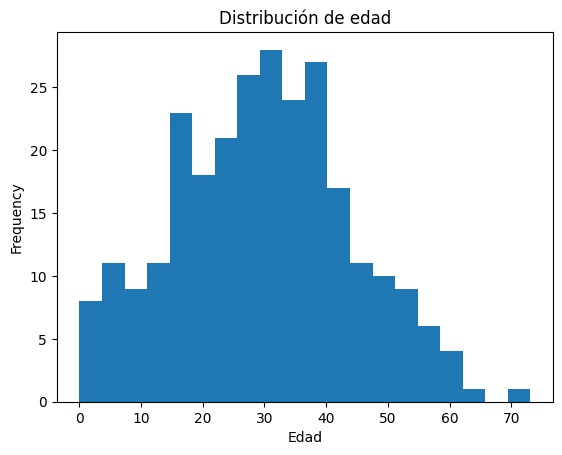

In [8]:
# Histograma de edades
plt.figure()
df['age'].plot(kind='hist', bins=20, title='Distribución de edad')
plt.xlabel('Edad')
plt.show()

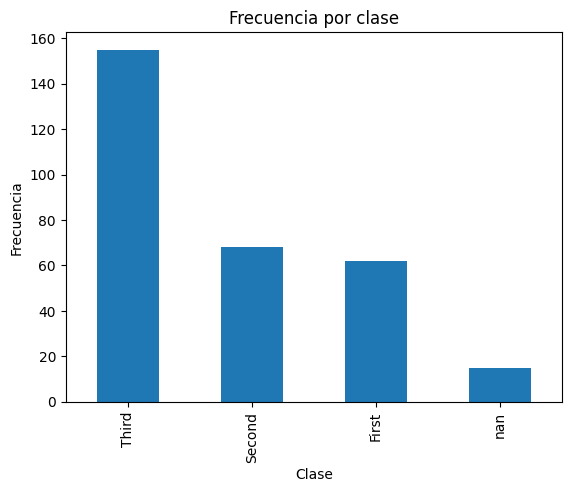

In [9]:
# Conteo por clase (First/Second/Third)
plt.figure()
df['class'].value_counts(dropna=False).plot(kind='bar', title='Frecuencia por clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

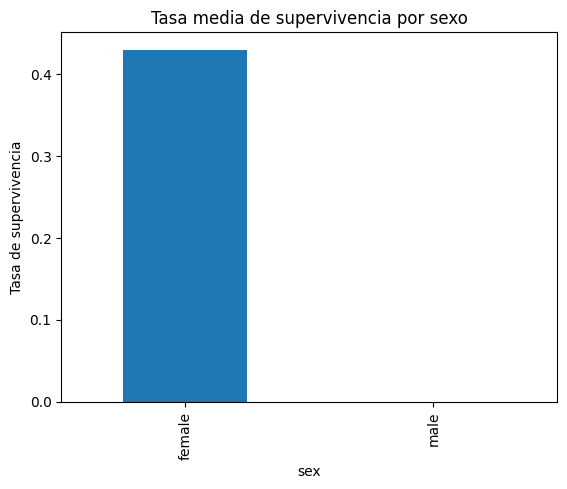

In [10]:
# Supervivencia por sexo (media de survived por categoría)
plt.figure()
df.groupby('sex')['survived'].mean().plot(kind='bar', title='Tasa media de supervivencia por sexo')
plt.ylabel('Tasa de supervivencia')
plt.show()

## 6) Ejercicios

1. Crea un fichero `requirements.txt` con las versiones impresas más arriba.
2. Mueve este *notebook* a una carpeta `notebooks/` y el CSV a `data/raw/`.
3. Identifica columnas con valores nulos y propone estrategias de imputación para cada una.
4. Añade al final una celda de *EDA* con al menos 2 gráficos adicionales sobre el dataset.

**Sugerencias:**
- Piensa qué gráficos son adecuados para cada tipo de variable (numérica vs categórica).
- Asegúrate de documentar tus decisiones en celdas Markdown.